In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader.data import DataReader

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end) #using global is sloopy

In [9]:
AAPL.describe()



,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,90.197638,87.661083,88.908593,88.999626,1.512742e+08,88.365985
std,20.808175,20.073348,20.628433,20.410538,7.496776e+07,20.762351
min,57.125000,53.152500,57.020000,56.092499,2.543240e+07,55.291519
25%,72.436878,70.623127,71.188128,71.954376,1.044768e+08,70.926895
50%,81.152500,79.735001,80.650002,80.707500,1.345164e+08,79.743801
75%,113.171251,109.638126,111.882502,111.657497,1.842475e+08,111.465193
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [10]:
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-11-19 to 2020-11-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


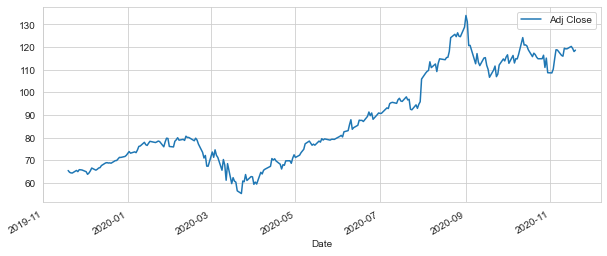

In [11]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))


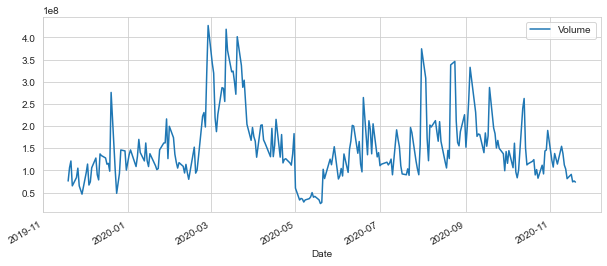

In [12]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))



For more info on the moving average check out the following links:

1.) link http://www.investopedia.com/terms/m/movingaverage.asp

2.) link http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

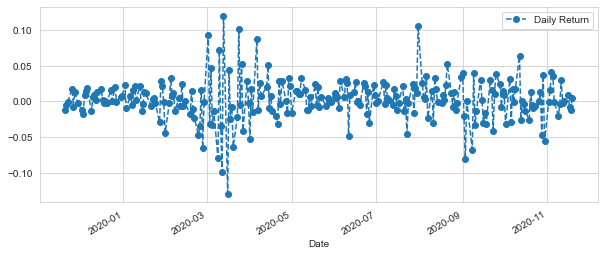

In [13]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


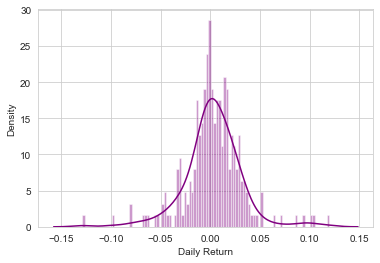

In [14]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100,color='purple')


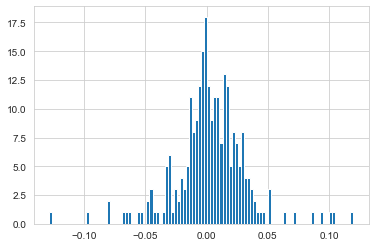

In [15]:
AAPL['Daily Return'].hist(bins=100)


In [16]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']


In [17]:
closing_df.head()


Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-11-19,65.466507,1315.459961,148.308868,1752.790039
2019-11-20,64.704376,1303.050049,148.051590,1745.530029
2019-11-21,64.414268,1301.349976,147.913040,1734.709961
2019-11-22,64.357727,1295.339966,148.021912,1745.719971
2019-11-25,65.486168,1306.689941,149.644714,1773.839966


In [18]:
tech_rets = closing_df.pct_change()


In [19]:
tech_rets.head()


Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-11-19,NaN,NaN,NaN,NaN
2019-11-20,-0.011642,-0.009434,-0.001735,-0.004142
2019-11-21,-0.004484,-0.001305,-0.000936,-0.006199
2019-11-22,-0.000878,-0.004618,0.000736,0.006347
2019-11-25,0.017534,0.008762,0.010963,0.016108


C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


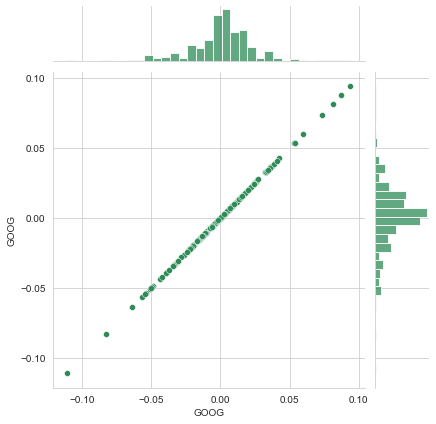

In [20]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')


C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


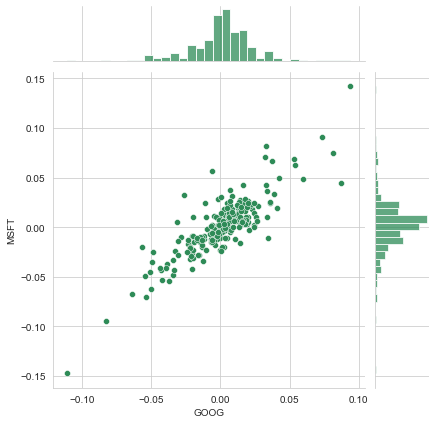

In [21]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')



Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

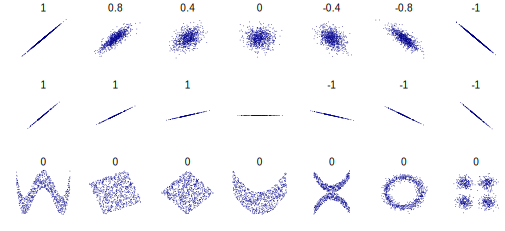

In [22]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')


Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

In [23]:
tech_rets.head()


Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-11-19,NaN,NaN,NaN,NaN
2019-11-20,-0.011642,-0.009434,-0.001735,-0.004142
2019-11-21,-0.004484,-0.001305,-0.000936,-0.006199
2019-11-22,-0.000878,-0.004618,0.000736,0.006347
2019-11-25,0.017534,0.008762,0.010963,0.016108


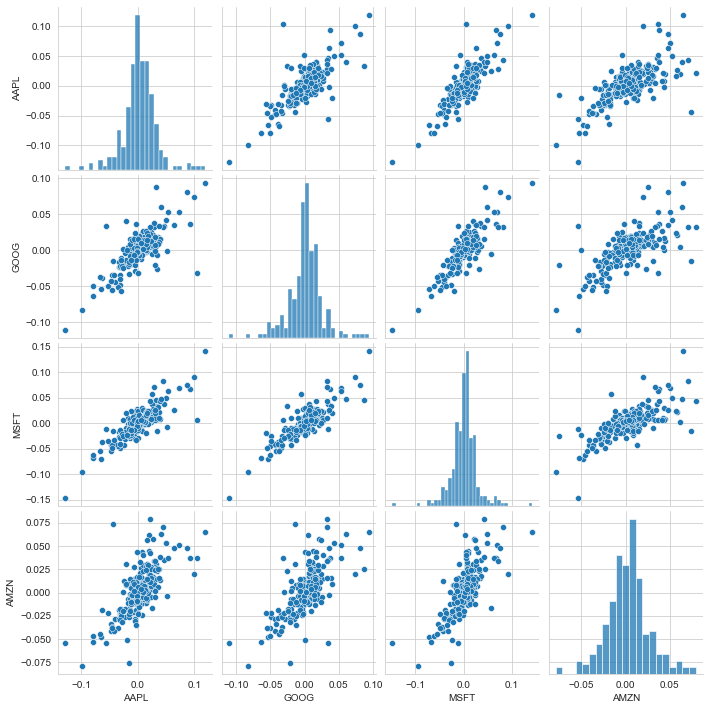

In [24]:
sns.pairplot(tech_rets.dropna())


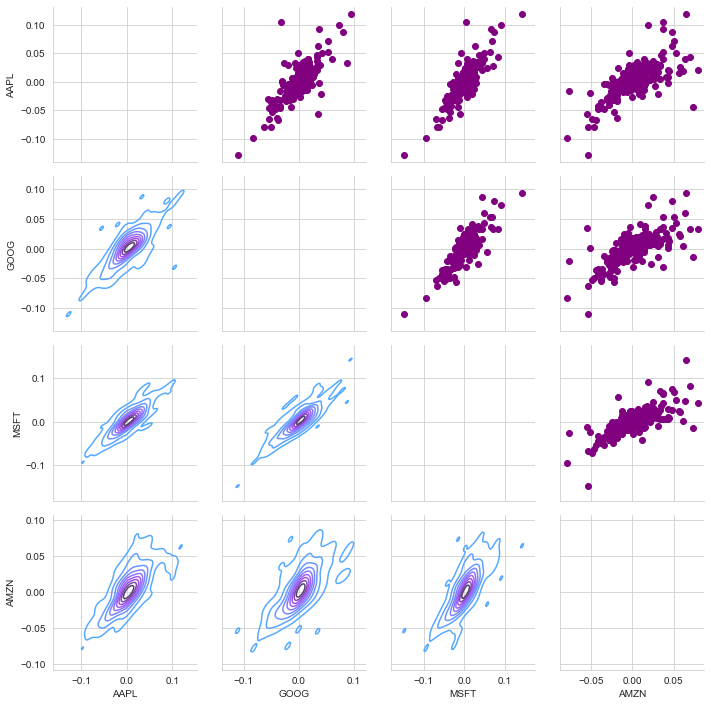

In [25]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

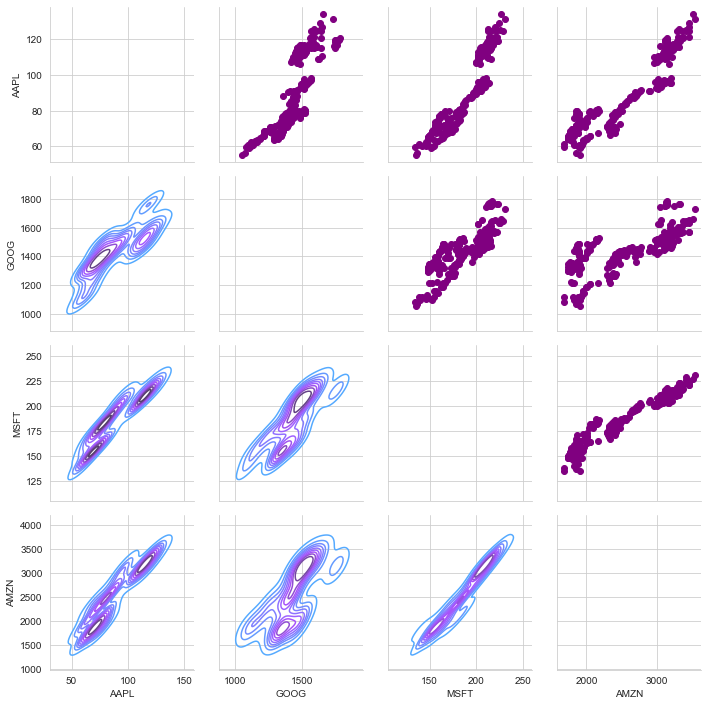

In [26]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

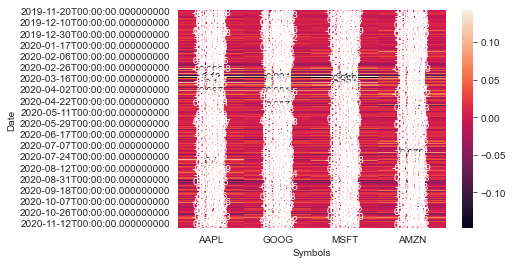

In [27]:

sns.heatmap(tech_rets.dropna(),annot=True)



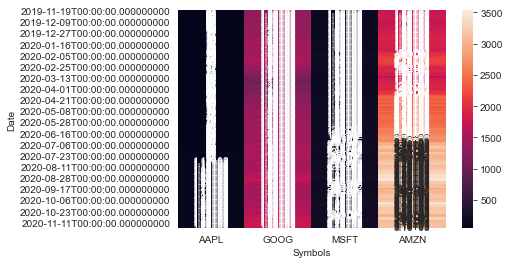

In [28]:
sns.heatmap(closing_df,annot=True)


In [29]:
rets = tech_rets.dropna()


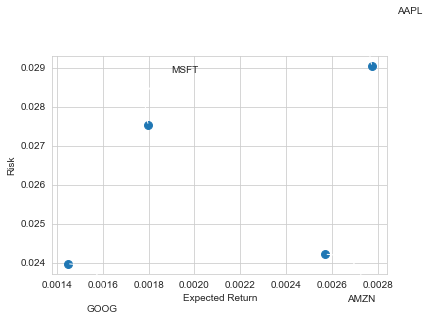

In [30]:
area = np.pi*20 #to see the circles on the plot

plt.scatter(rets.mean(), rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y, i in zip(rets.columns, rets.mean(), rets.std(), range(len(rets.columns))):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50*(-1)**i),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.6'))


Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

C:\Users\Tayyab Nadeem\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


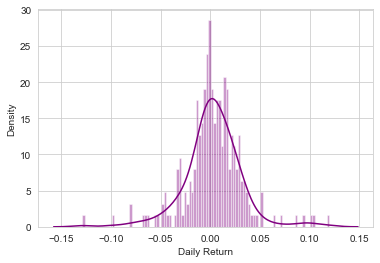

In [31]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


In [32]:
rets.head()


Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-11-20,-0.011642,-0.009434,-0.001735,-0.004142
2019-11-21,-0.004484,-0.001305,-0.000936,-0.006199
2019-11-22,-0.000878,-0.004618,0.000736,0.006347
2019-11-25,0.017534,0.008762,0.010963,0.016108
2019-11-26,-0.007809,0.005250,0.005290,0.013023


In [33]:

#Apple
rets['AAPL'].quantile(0.05)

-0.04480970241041178

In [34]:
#Repeating this for the rest as an exercise


In [35]:
#Google
rets['GOOG'].quantile(0.05)

-0.04073442329937413

In [36]:
#Microsoft
rets['MSFT'].quantile(0.05)

-0.041652731837761636

In [37]:

#Amazon
rets['AMZN'].quantile(0.05)

-0.03694479005576301


Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$$ \frac{\Delta S}{S} = \mu \Delta t + \sigma \epsilon \sqrt{\Delta t} $$
Where $S$ is the stock price, $\mu$ is the expected return (which we calculated earlier), $\sigma$ is the standard deviation of the returns, $t$ is time, and $\epsilon$ is the random variable.

We can mulitply both sides by the stock price ($S$) to rearrange the formula and solve for the stock price.

$$ \Delta S = S\left(\mu \Delta t + \sigma \epsilon \sqrt{\Delta t}\right) $$
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [38]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [39]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [40]:
GOOG.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-13,1781.040039,1744.550049,1757.630005,1777.020020,1499900,1777.020020
2020-11-16,1799.069946,1767.689941,1771.699951,1781.380005,1246800,1781.380005
2020-11-17,1785.000000,1767.000000,1776.939941,1770.150024,1147100,1770.150024
2020-11-18,1773.469971,1746.140015,1765.229980,1746.780029,1173500,1746.780029
2020-11-19,1769.589966,1737.005005,1738.380005,1763.920044,1247900,1763.920044


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

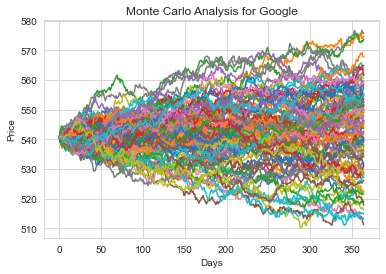

In [41]:
start_price = 540.622

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [42]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

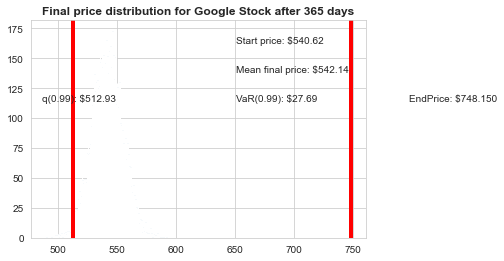

In [43]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Display 1% quantile
plt.figtext(1, 0.6, "EndPrice: $748.150")

# Plot a line at the 1% quantile result
plt.axvline(x=748.150, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [44]:
apple = {}
apple['days'] = 365

apple['dt'] = 1/days

apple['mu'] = rets.mean()['AAPL']

apple['sigma'] = rets.std()['AAPL']

In [45]:
AAPL.tail()


,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2020-11-13,119.669998,117.870003,119.440002,119.260002,81581900.0,119.260002,0.000419
2020-11-16,120.989998,118.150002,118.919998,120.300003,91183000.0,120.300003,0.008720
2020-11-17,120.669998,118.959999,119.550003,119.389999,74271000.0,119.389999,-0.007564
2020-11-18,119.820000,118.000000,118.610001,118.029999,76322100.0,118.029999,-0.011391
2020-11-19,119.059998,116.809998,117.589996,118.639999,73860200.0,118.639999,0.005168


Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

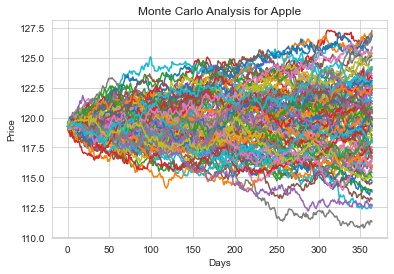

In [46]:
apple['start_price'] = 119.27

for run in range(100):
    plt.plot(stock_monte_carlo(apple['start_price'],apple['days'],apple['mu'],apple['sigma']))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Apple')

In [47]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(apple['start_price'],apple['days'],apple['mu'],apple['sigma'])[days-1]

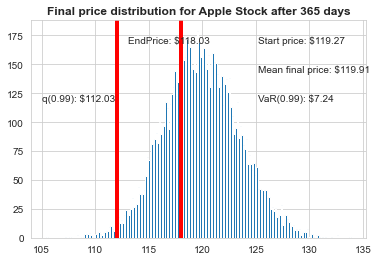

In [48]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.65, 0.8, s="Start price: $%.2f" %apple['start_price'])
# Mean ending price
plt.figtext(0.65, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.65, 0.6, "VaR(0.99): $%.2f" % (apple['start_price'] - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Display 1% quantile
plt.figtext(0.35, 0.8, "EndPrice: $118.03")

# Plot a line at the 1% quantile result
plt.axvline(x=118.02, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Apple Stock after %s days" %apple['days'], weight='bold');